# **CONTENT**
Geometrical Ooperations on Image: TRANSFORMATION
1. Trasnlation
2. Scaling : Enlarging & Shrinking
3. Zooming
3. Shearing
4. Reflection / Mirroring
5. Rotation
6. Cropping
7. Affine Transformation 
8. Inverse Transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
import skimage

ModuleNotFoundError: ignored

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
#import matplotlib.image as mpimg 
#from matplotlib.pyplot import imshow
#%matplotlib inline

# **TRANSLATION:**
Image translation is the rectilinear shift of an image from a location to another, so the shifting of the of an object is called translation.In OpenCV, there are two built-in functions for performing transformations:
1. **cv2.warpPerspective:** takes (3x3) transformation matrix as input.
2. **cv2.warpAffine:** takes a (2x3) transformation matrix as input.

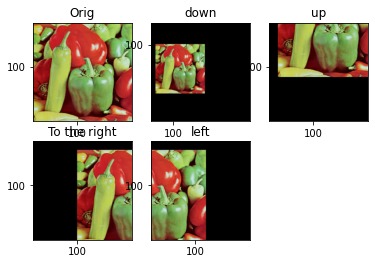

In [ ]:
img_T = cv.imread('/content/fruits.jpg')
image = cv.cvtColor(img_T, cv.COLOR_BGR2RGB)

# The image moves down, up, right, left
M = np.float32([[1, 0, 20], [0, 1, 100], [0, 0, 1]])
img1 = cv.warpPerspective(image, M, (image.shape[1]*2, image.shape[0]*2))

M = np.float32([[1, 0, 20], [0, 1, -100], [0, 0, 1]])
img2 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

M = np.float32([[1, 0, 100], [0, 1, 20], [0, 0, 1]])
img3 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

M = np.float32([[1, 0, -100], [0, 1, 20], [0, 0, 1]])
img4 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

# Display graphics
titles = ['Orig', 'down', 'up', 'To the right', 'left']
images = [image, img1, img2, img3, img4]
for i in range(1,6):            
    plt.subplot(2, 3, i )  
    
    plt.imshow(images[i-1])          
    plt.title(titles[i-1])
    plt.xticks([100]), plt.yticks([100])
plt.show()
plt.imsave("fruits_translated1.jpg",img1)
plt.imsave("fruits_translated2.jpg",img2)

In [ ]:
from google.colab import files
files.upload()

Saving fruits.jpg to fruits.jpg


{'fruits.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x15\x15\x17\x18\x1a\x1b\x18\x17\x17\x17\x17\x17\x18\x1a\x18\x17\x17\x18\x17\x1d\x1d\x18\x17\x18\x1d( \x18\x1d%\x1b\x1a\x17!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-%\x1f%--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x07\x01\x00\x08\xff\xc4\x00A\x10\x00\x01\x03\x02\x04\x03\x05\x04\x08\x04\x05\x04\x03\x00\x00\x00\x01\x00\x02\x03\x04\x11\x05\x12!1\x06AQaq\x81\x91\xa1\x13"2\xb1\x07\x14BRr\xc1\xd1\xf0#\x92\xb2\xe1\x153b\xa2\xf1Ss\x82\xd2\x16$4\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\x07\xff\xc4\x002\x11\x00\x02\x02\x01\x04\x00\x04\x05\x01\t\x00\x03\x00\x00\x00\x00\x00\x01\

# **IMAGE SCALING:**
Image scaling is a process used to resize a digital image. 
OpenCV has a built-in function cv2.resize(), 
but we will perform transformation using matrix multiplication. 


(225, 225, 3)


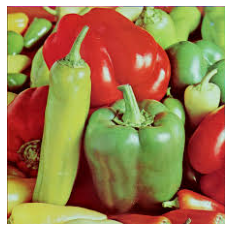

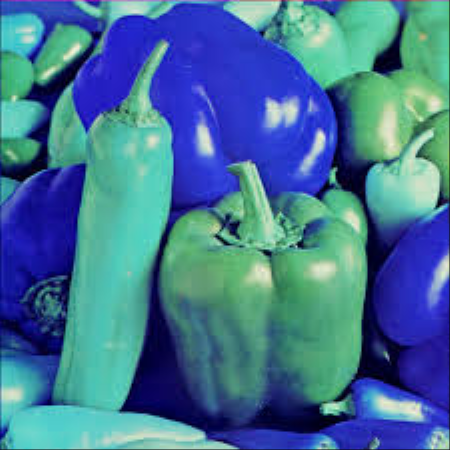

(450, 450, 3)


In [ ]:
img_S = cv.imread('fruits.jpg')
# convert from BGR to RGB so we can plot using matplotlib
image1 = cv.cvtColor(img_S, cv.COLOR_BGR2RGB)
print(image1.shape)
#rows, cols, dim = image1.shape
#print(rows)

# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(image1)
plt.show()
# get the image shape
rows, cols, dim = image1.shape
#transformation matrix for Scaling
M = np.float32([[2, 0  , 0],
            	[0,   2, 0],
            	[0,   0,   1]])
# apply a perspective transformation to the image
scaled_img = cv.warpPerspective(image1,M,(cols*2,rows*2))
# disable x & y axis
#plt.axis('off')
# show the resulting image
cv2_imshow(scaled_img)
#plt.imshow(scaled_img)
print(scaled_img.shape)
#plt.show()
# save the resulting image to disk
plt.imsave("fruits_scaled.jpg", scaled_img)

# **IMAGE SHEARING**
Shear mapping is a linear map that displaces each point in fixed direction, it substitutes every point horizontally or vertically by a specific value in propotional to its x or y coordinates, there are two types of shearing effects.

**Shearing in the x-axis Direction:** When shearing is done in the x-axis direction, the boundaries of the image that are parallel to the x-axis keep their location, and the edges parallel to y-axis changes their place depending on the shearing factor

**Shearing in the y-axis Direction:**
When shearing is done in the y-axis direction, the boundaries of the image that are parallel to the y-axis keep their location, and the edges parallel to x-axis changes their place depending on the shearing factor.

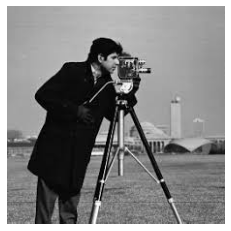

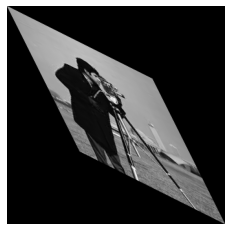

In [ ]:
img_SH = cv.imread("/content/cameraman.jpg")
# convert from BGR to RGB so we can plot using matplotlib
image2 = cv.cvtColor(img_SH, cv.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(image2)
plt.show()
# get the image shape
rows, cols, dim = image2.shape
# transformation matrix for Shearing
# shearing applied to x-axis
M1 = np.float32([[1, 0.5, 0],
             	[0.5, 1  , 0],
            	[0, 0  , 1]])

# apply a perspective transformation to the image                
sheared_imgx = cv.warpPerspective(image2,M1,(int(cols*1.5),int(rows*1.5)))
#sheared_imgy = cv.warpPerspective(image2,M2,(int(cols*1.5),int(rows*1.5)))

# disable x & y axis
plt.axis('off')
# show the resulting image
 
plt.imshow(sheared_imgx)
plt.show()
# save the resulting image to disk
plt.imsave("cameramen_sheared.jpg", sheared_img)

# **IMAGE REFLECTION:**
Image reflection (or mirroring) is useful for flipping an image, it can flip the image vertically as well as horizontally, it is a particular case of scaling. For reflection along the x-axis, we set the value of Sy to -1, and Sx to 1 and vice-versa for the y-axis reflection.

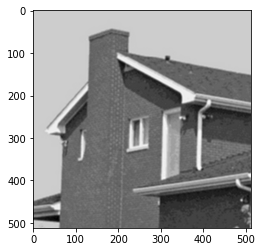

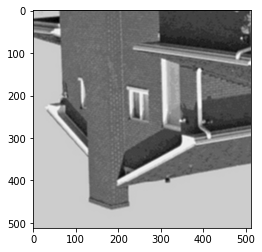

In [ ]:
img_RE = cv.imread("/content/house.tif")
# convert from BGR to RGB so we can plot using matplotlib
image3 = cv.cvtColor(img_RE, cv.COLOR_BGR2RGB)
# disable x & y axis
#plt.axis('off')
# show the image
plt.imshow(image3)
plt.show()
# get the image shape
rows, cols, dim = image3.shape
# transformation matrix for x-axis reflection 
M = np.float32([[1,  0, 0   ],
                [0, -1, rows],
                [0,  0, 1   ]])

# apply a perspective transformation to the image
reflected_img = cv.warpPerspective(image3,M,(int(cols),int(rows)))
# disable x & y axis
#plt.axis('off')
# show the resulting image
plt.imshow(reflected_img)
plt.show()
# save the resulting image to disk
#plt.imsave("city_reflected.jpg", reflected_img)

# **IAMGE ROTATION:**

Rotation is a concept in mathematics that is a motion of a certain space that preserves at least one point. 

Image rotation is a common image processing routine with applications in matching, alignment, and other image-based algorithms, it is also extensively in data augmentation, especially when it comes to image classification.

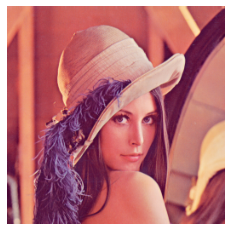

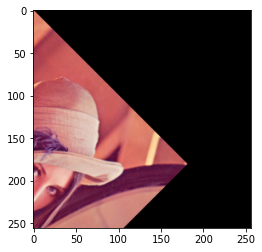

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_RO = cv.imread("/content/lena_color_256.tif")
# convert from BGR to RGB so we can plot using matplotlib
image4 = cv.cvtColor(img_RO, cv.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(image4)
plt.show()
# get the image shape
rows, cols, dim = image4.shape
#angle from degree to radian
angle = np.radians(45)
#transformation matrix for Rotation
M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])
# apply a perspective transformation to the image
rotated_img = cv.warpPerspective(image4, M, (int(cols),int(rows)))
# disable x & y axis
#plt.axis('off')
# show the resulting image
plt.imshow(rotated_img)
plt.show()
# save the resulting image to disk
plt.imsave("leena_rotated.jpg", rotated_img)

# **IMAGE CROPPING**

Image cropping is the removal of unwanted outer areas from an image, a lot of the above examples introducted black pixels, you can easily remove them using cropping. The below code does that:

croppedImage = img[startRow:endRow, startCol:endCol]


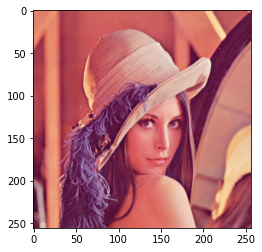

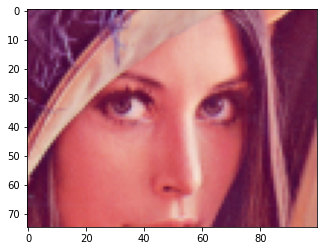

In [ ]:
img_CR = cv.imread("/content/lena_color_256.tif")
# convert from BGR to RGB so we can plot using matplotlib
image5 = cv.cvtColor(img_CR, cv.COLOR_BGR2RGB)
# disable x & y axis
#plt.axis('off')
# show the image
plt.imshow(image5)
plt.show()
# get 200 pixels from 100 to 300 on both x-axis & y-axis
# change that if you will, just make sure you don't exceed cols & rows
cropped_img = image5[100:175, 100:200]
# disable x & y axis
#plt.axis('off')
# show the resulting image
plt.imshow(cropped_img)
plt.show()
# save the resulting image to disk
plt.imsave("leena_cropped.jpg", cropped_img)

# **AFFINE TRANSFORMATION**
In affine transformation, all parallel lines in the original image will still be parallel in the output image. 

To find the transformation matrix, we need three points from input image and their corresponding locations in output image. 

Then cv2.getAffineTransform will create a 2x3 matrix which 
is to be passed to cv2.warpAffine.

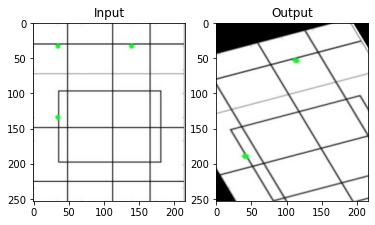

In [ ]:
img_AF = cv.imread('/content/DRAWING.jpg')
rows,cols,ch = img_AF.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)

dst = cv.warpAffine(img_AF,M,(cols,rows))

plt.subplot(121),plt.imshow(img_AF),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# **Perspective Transformation**
For perspective transformation, we need a 3x3 transformation matrix. 

Straight lines will remain straight even after the transformation. 

To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

(512, 512, 3)


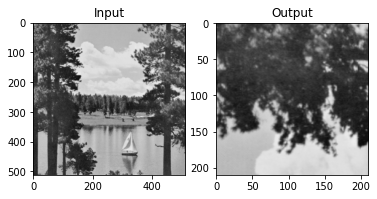

In [ ]:
img_PT = cv.imread('/content/lake.tif')
rows,cols,ch = img_PT.shape
print(img_PT.shape)

pts1 = np.float32([[30,31],[15,191],[184,28],[195,192]])
pts2 = np.float32([[0,0],[210,0],[0,210],[210,210]])

M = cv.getPerspectiveTransform(pts1,pts2)

dst = cv.warpPerspective(img_PT,M,(210,210))

plt.subplot(121),plt.imshow(img_PT),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()